In [2]:
import pandas as pd

In [3]:
!wget -P /content/drive/MyDrive/LaMiaCartellaDataset https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_authors.json

--2023-11-01 09:00:57--  https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_authors.json
Resolving sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)... 52.95.153.26, 52.95.152.26
Connecting to sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)|52.95.153.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 549013002 (524M) [application/json]
Saving to: ‘/content/drive/MyDrive/LaMiaCartellaDataset/lighter_authors.json’

lighter_authors.jso 100%[===================>] 523.58M  32.5MB/s    in 17s     

2023-11-01 09:01:14 (31.1 MB/s) - ‘/content/drive/MyDrive/LaMiaCartellaDataset/lighter_authors.json’ saved [549013002/549013002]



In [1]:
filename0 = "/content/drive/MyDrive/LaMiaCartellaDataset/lighter_authors.json"

In [4]:
# Read the data
df_chunks = pd.read_json(filename0, lines=True, dtype={'ratings_count': 'int32', 'text_reviews_count':'int32', 'works_count':'int32', 'id':'int32', 'fans_count':'int32', 'name':'string', 'gender':'string', 'image_url':'string', 'average_rating':'float16', 'about':'string'}, chunksize=10000)
#E' UN ITERATORE CHE MI LEGGE I DATI A BLOCCHI

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Loop through each chunk and append it to the result DataFrame
for chunk in df_chunks:
    df = pd.concat([df, chunk], ignore_index=True)

In [ ]:
df.columns

Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       'fans_count'],
      dtype='object')

In [ ]:
df.info() #35mila x 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int32  
 1   average_rating      351767 non-null  float16
 2   text_reviews_count  351767 non-null  int32  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int32  
 6   id                  351767 non-null  int32  
 7   name                351767 non-null  string 
 8   gender              351767 non-null  string 
 9   image_url           351767 non-null  string 
 10  about               351767 non-null  string 
 11  fans_count          351767 non-null  int32  
dtypes: float16(1), int32(5), object(2), string(4)
memory usage: 23.5+ MB


In [6]:
!wget -P /content/drive/MyDrive/LaMiaCartellaDataset https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json

--2023-11-02 11:02:58--  https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json
Resolving sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)... 52.95.152.12, 52.95.151.38
Connecting to sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)|52.95.152.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16123393395 (15G) [application/json]
Saving to: ‘/content/drive/MyDrive/LaMiaCartellaDataset/lighter_books.json’

lighter_books.json  100%[===================>]  15.02G  29.5MB/s    in 10m 48s 

2023-11-02 11:13:47 (23.7 MB/s) - ‘/content/drive/MyDrive/LaMiaCartellaDataset/lighter_books.json’ saved [16123393395/16123393395]



In [4]:
filename1 = "/content/drive/MyDrive/LaMiaCartellaDataset/lighter_books.json"
import pandas as pd

In [5]:
d = pd.read_json(filename1, lines=True, nrows=10)
print(d.columns)

FileNotFoundError: ignored

In [8]:
# Read the data
df_chunks = pd.read_json(filename1, lines=True, chunksize=200000)

# Create an empty DataFrame to store the results
df1 = pd.DataFrame()

# Loop through each chunk and append it to the result DataFrame
for chunk in df_chunks:
  chunk = chunk[['id', 'title', 'original_publication_date', 'num_pages',
                 'series_name', 'author_name', 'author_id', 'average_rating', 'format',
                 'rating_dist', 'ratings_count', 'text_reviews_count', 'language']]
  df1 = pd.concat([df1, chunk], ignore_index=True) #7027431

In [6]:
#We create two different lists, date with the entire original publication date in tuples, and date_y with just the year.
#The problem is that for some books the month is missing.
date = []
date_y=[]
date_m=[]
for i in df1['original_publication_date']:
  dd=tuple(i.split('-'))
  date.append(dd) #not necessary useful
  date_y.append(i.split('-')[0])

  #Some books don't have the specified month of publication date, but just the year.
  #So we create a list for the months and when it is not specified we insert 0.
  if len(i.split('-'))>1:
    date_m.append(i.split('-')[1])
  else:
    date_m.append(0)

date_y = ['0' if i=='' else i for i in date_y]
date_y = [int(i) for i in date_y]
date_m = [int(i) for i in date_m]

#We add the column with the years and the months
df1['publication_year']=date_y
df1['publication_month']=date_m
#print((df1['publication_year']==0).sum())

In [5]:
#Changing the gender into 3 categories:
genders = df['gender'].unique()

# Define category mappings
category_mapping = {
    # Male Genders
    'Male': {
        'Male', 'male', 'man', 'Man'
    },

    # Female Genders
    'Female': {
        'Female', 'Woman', 'Femme', 'She/Her/Hers', 'female'
    },

    # Non-binary Genders
    'Queer': {
        'Non-binary', 'Non-binary (multiple instances)', 'Non binary', 'Non-Binary', 'Non-binary Woman',
        'Nonbinary', 'Nonbinary Woman', 'Nonbinary genderfluid', 'Non-binary genderqueer', 'Non-binary trans guy',
        'Non-binary/transmasculine', 'Non-binary Transgender', 'Non-Binary Transgender', 'Non binary trans person', 'Non binary trans woman',
        'Non-binary Transmasculine', 'Non-Binary Woman', 'Bigender', 'Bigender (female and agender)', 'Two-spirit', 'Agender',
        'Genderqueer', 'Genderqueer transfemme', 'Genderqueer Femme', 'Genderqueer genderfluid', 'Genderqueer non-binary',
        'Genderqueer transfeminine', 'Gender Non-Conforming', 'Genderless', 'Androgynous', 'Transmasculine non-binary', 'Transfemale', 'Transgender female',
        'Transfeminine', 'Trans-female', 'Transwoman', 'Trans woman', 'Trans man', 'Male (FtM)', 'Trans-Male', 'Transman',
        'Transmasculine', 'Trans male', 'Transgender male', 'FtM',
    },
}

# Categorize genders
categorized_genders = {}
for category, values in category_mapping.items():
    categorized_genders[category] = set(filter(lambda x: x in values, genders))

def update_gender(gender):
    for new_gender, mappings in category_mapping.items():
        if gender in mappings:
            return new_gender
    return 'Other'  # Assign to 'Other' if not found in any category

# Apply the custom function to update the genders
df['gender'] = df['gender'].apply(update_gender)

NameError: ignored

In [ ]:
#PUNTO 3
import pandas as pd
from statistics import mode

def info_year(year):
  books = df1[df1['publication_year']==year]

  #The number of books published that year:
  published_b = len(books.index)

  #The total number of pages written that year:
  books['num_pages']= books['num_pages'].replace('', '0')
  books['num_pages']= books['num_pages'].astype(int)
  num_pages = books['num_pages'].sum()

  #The most prolific month of that year:
  months = books['publication_month']
  months_small = []
  for i in months: #Eliminating the 0 that are the unspecified months
    while i!=0:
      months_small.append(i)
      break
  if months_small:
    frequent_month = mode(months_small)
  else: #In the case this list is empty, it means that the months were all 0 (not specified)
    frequent_month ="There isn't enough information to find the most prolific month of this year"

  #The longest book written that year:
  index_max = books['num_pages'].idxmax() #Estracting the index of the maximum
  longest_b = books.loc[index_max, 'title']


  return(published_b, num_pages, frequent_month, longest_b)

#res=info_year(2003) #FUNZIONA però da SettingWithCopyWarning
#print("Le info dell'anno 2003 sono: ", res)


In [ ]:
from numpy import NaN
#Use this function to build your data frame: the primary key will be a year,
#and the required information will be the attributes within the row.
#Finally, show the head and the tail of this new data frame considering the
#first ten years registered and the last ten years.

years = df1['publication_year'].unique() #years is the primary key
list_years = []
for i in years:
  if i!=0 and i<2024:
    info = info_year(i)
    list_years.append([i] + list(info))

df_years = pd.DataFrame(list_years, columns = ['years', 'published_book', 'num_pages', 'frequent_month', 'longest_book'])
print('First ten years registered:')
print(df_years.head(10))
print('\nLast ten years registered:')
print(df_years.tail(10))

#OK VA BENE

<ipython-input-43-f7badb96595c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['num_pages']= books['num_pages'].replace('', '0')
<ipython-input-43-f7badb96595c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['num_pages']= books['num_pages'].astype(int)


First ten years registered:
   years  published_book   num_pages frequent_month  \
0   2003          146590    24187956              1   
1   1997          100289  2166944120              1   
2   1998          107045    18121729              1   
3   1999          114031    19759525              1   
4   2000          126668  2168781641              1   
5   2005          169033    27633904              1   
6   1979           32522     5351513              1   
7   1996           92695    15808512              1   
8   2002          133797    22688262              1   
9   1984           43562     7124459              1   

                                        longest_book  
0  21st Century Complete Guide To The National Se...  
1                                  שלושה סיפורי אהבה  
2                                         Prealgebra  
3  Theological and Miscellaneous Works of Joseph ...  
4                                     Dentes Brancos  
5  A Practical Guide to Linux Comman

In [ ]:
#Soluzione di CHATGPT (2)
import pandas as pd

# Assuming you have two DataFrames 'df' and 'df1' as you described
# Extract the year from the 'original_publication_date' column in df1
df1['publication_year'] = pd.to_datetime(df1['original_publication_date'], errors='coerce').dt.year

# Define a function to get information for a specific year
def get_yearly_info(year):
    select_books = df1[df1['publication_year'] == year]

    # The number of books published that year
    published_books = len(select_books)

    # The total number of pages written that year
    select_books['num_pages'] = pd.to_numeric(select_books['num_pages'], errors='coerce')
    total_pages = select_books['num_pages'].sum()

    # The most prolific month of that year
    most_prolific_month = select_books['original_publication_date'].str.split('-', expand=True)[1].mode().values[0]

    # The longest book written that year
    longest_book = select_books.loc[select_books['num_pages'].idxmax()]['title']

    return [published_books, total_pages, most_prolific_month, longest_book]

# Create a DataFrame for the required information
years = list(range(1990, 2023))  # Assuming you have data from 1990 to 2022
data = []

for year in years:
    info = get_yearly_info(year)
    data.append(info)

columns = ['Books Published', 'Total Pages', 'Most Prolific Month', 'Longest Book']
yearly_info_df = pd.DataFrame(data, index=years, columns=columns)

# Display the head and tail of the DataFrame
print("Head of the DataFrame:")
print(yearly_info_df.head(10))

print("\nTail of the DataFrame:")
print(yearly_info_df.tail(10))


#This solution of CHATGPT works. The output is different for some books because
#CHATGPT assumes that the range of the years is from 1990 to 2023 (in our
#solution we assume that the years is maximum 2023, but a book can be published
#also before 1990).
#To prove this solution we just described to CHATGPT the structure of the dataset
#of the authors, specifying that the 'original_publication_date' is sometimes
#incomplete (for this reason it uses errors='coerce'), and then we run the code.
#It gives a SettingWithCopyWarning because it is modifying a column of the Dataframe
#and this can bring changes to the original data.

<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_books['num_pages'] = pd.to_numeric(select_books['num_pages'], errors='coerce')
<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_books['num_pages'] = pd.to_numeric(select_books['num_pages'], errors='coerce')
<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Head of the DataFrame:
      Books Published   Total Pages Most Prolific Month  \
1990            61655  1.055410e+07                  01   
1991            65571  1.136554e+07                  01   
1992            70826  1.226798e+07                  01   
1993            73965  1.294439e+07                  01   
1994            79082  1.348162e+07                  01   
1995            86212  1.468196e+07                  01   
1996            92696  1.580852e+07                  01   
1997           100289  2.166944e+09                  01   
1998           107046  1.812173e+07                  01   
1999           114032  1.975968e+07                  01   

                                           Longest Book  
1990  The New International Commentary on the Old Te...  
1991           The New American Commentary Series (NAC)  
1992             Paperbound Books in Print, Spring 1992  
1993                     En grusom kvinnes bekjennelser  
1994    Richard Wright: A Collection 

<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_books['num_pages'] = pd.to_numeric(select_books['num_pages'], errors='coerce')
<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_books['num_pages'] = pd.to_numeric(select_books['num_pages'], errors='coerce')
<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
from numpy.lib.function_base import digitize
#PUNTO 4

#You should be sure there are no eponymous (different authors who have precisely
#the same name) in the author's dataset. Is it true?
duplicates= list(df['name'].duplicated())
if len(duplicates) !=0:
  print("It's true, there are no eponymous authors")
else:
  print("It's not true, there are eponymous authors")

#Write a function that, given a list of author_id, outputs a dictionary where
#each author_id is a key, and the related value is a list with the names of all
#the books the author has written.
def books_dict(author_id, dataframe):
  diz = dict()
  for i in author_id:
    author_books = dataframe[dataframe['author_id']==i]
    titles= list(author_books['title'])
    diz[i]=titles

  return(diz)

#What is the longest book title among the books of the top 20 authors regarding
#their average rating? Is it the longest book title overall?
id_authors=list(df['id'])
authors_total = df[['average_rating', 'id','name']]
authors_total = authors_total.sort_values(by='average_rating', ascending=False)
authors_20top = authors_total[:20] #Find the top 20 authors
diz_20top = books_dict(authors_20top['id'], df1)

max_t=0
for id, titles in diz_20top.items():
  for i in titles:
    if len(i) > max_t:
      max_t=len(i)
      longest_book=i
print("\nThe longest book title among the books of the top 20 authors regarding their average rating is:\n", longest_book)

diz_total = books_dict(id_authors, df1)
max_all=0
for id, titles in diz_total.items():
  for i in titles:
    if len(i) > max_all:
      max_all=len(i)
      longest_all=i

if longest_all==longest_book:
  print("It is the longest book title overall.")
else:
  print("It is not the longest book title overall.") #FINO A QUI FUNZIONA, OK!

#What is the shortest overall book title in the dataset? If you find something
#strange, provide a comment on what happened and an alternative answer.
min_all=float('inf')
for id, titles in diz_total.items():
  for i in titles:
    if len(i) < min_all:
      min_all=len(i)
      shortest_all=i
if shortest_all != None and shortest_all != 0:
  print("The shortest overall book title has length: ", min_all)
elif shortest_all == 0:
  print("There is something strange, the shortest book has length 0")

diz_tot = books_dict(df1['author_name'], df1)
min_t=0
for id, titles in diz_tot.items():
  for i in titles:
    if len(i) <= min_t:
      min_t=len(i)
      shortest_book=i
print("\nThe shortest overall book title is:\n", shortest_book)

#DA RUNNARE SOLO L'ULTIMA PARTE PER STAMPARE IL TITOLO PIù CORTO (che ha lunghezza 0)

It's true, there are no eponymous authors

The longest book title among the books of the top 20 authors regarding their average rating is:
 Political Debates Between Hon. Abraham Lincoln and Hon. Stephen A. Douglas, in the Celebrated Campaign of 1858 in Illinois; Including the Preceding Speeches of Each, at Chicago, Springfield, Etc.; Also the Two Great Speeches of Mr. Lincoln in Ohio, in 185
It is the longest book title overall.
The shortest overall book title is:  0


The top 10 most influential authors are:
 1017             Stephen King
1161          James Patterson
27110         Cassandra Clare
4537             Rick Riordan
169374          Veronica Roth
205870         Colleen Hoover
100166             John Green
3818      Neil deGrasse Tyson
32358            Mindy Kaling
6397              Bill  Gates
Name: name, dtype: string
The most influential author is:  Stephen King

There isn't a longest serie name.

There is  1  author with different formats publications.



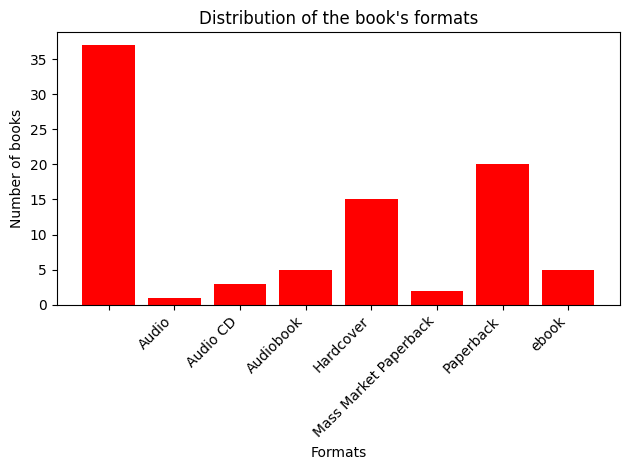

Information about the general response from readers for the 10 influent authors:
                        name  gender  average_rating  ratings_count  \
1017           Stephen King    Male        4.039062       15195579   
1161        James Patterson    Male        3.980469        6514711   
27110       Cassandra Clare  Female        4.238281        7401435   
4537           Rick Riordan    Male        4.320312        9144089   
169374        Veronica Roth  Female        4.050781        5739316   
205870       Colleen Hoover  Female        4.238281        2239503   
100166           John Green   Other        4.031250        7186569   
3818    Neil deGrasse Tyson   Other        4.070312         175216   
32358          Mindy Kaling   Other        3.880859         611045   
6397            Bill  Gates   Other        3.849609           9418   

        text_reviews_count  fans_count  
1017                608956      766035  
1161                333220      317040  
27110               4161

In [38]:
import numpy as np
import matplotlib.pyplot as plt
#PUNTO 5
#Plot the top 10 most influential authors regarding their fan count and number
#of books. Who is the most influential author?

#AUTHORS: Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       #'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       #'fans_count']

#Ordering by fan count
authors_influential = df.sort_values(by = 'fans_count', ascending = False)
authors_influential = authors_influential[:10]
#Ordering by number of books
authors_influential = authors_influential.sort_values(by = 'works_count', ascending = False)
print("The top 10 most influential authors are:\n", authors_influential['name'])

most_influent = authors_influential.iloc[0]
print("The most influential author is: ", most_influent['name'])

#Have they published any series of books? If any, extract the longest series
#name among these authors.

#Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'isbn',
      # 'isbn13', 'asin', 'language', 'average_rating', 'rating_dist',
      # 'ratings_count', 'text_reviews_count', 'publication_date',
      # 'original_publication_date', 'format', 'edition_information',
      # 'image_url', 'publisher', 'num_pages', 'series_id', 'series_name',
      # 'series_position', 'shelves', 'description']
names_influent= authors_influential['name']
for i in names_influent:
  influent = df1[df1['author_name']==i]

max=0
longest_series_name=None #in the case there isn't a serie name
names_series= influent['series_name']
for j in names_series:
  if len(j) > max:
    max=len(j)
    longest_series_name = j

if longest_series_name != None:
  print("\nThe longest series name is: ", longest_series_name)
else:
  print("\nThere isn't a longest serie name.")

#How many of these authors have been published in different formats?
#Provide a meaningful chart on the distribution of the formats and comment on it.

#First we create a dictionary with the author name as the key and the formats as the elements for each one.
def format_dict(author_name, dataframe):
  diz = dict()
  influent_10 = dataframe[dataframe['author_name']==author_name]
  formats= list(influent_10['format'])
  diz[author_name]=formats

  return(diz)

formats_count = {}
for i in names_influent:
    diz_format = format_dict(i, df1)

    #Calculating the number of unique formats for the author i
    formats_set = set(diz_format[i])
    formats_count[i] = len(formats_set)

#Then we see if there are duplicates in the format.
count=0
for i in diz_format.values():
  if len(set(i)) != len(i):
    count = count+1
if count==0:
  print("\nThere are no author with different formats publications.\n")
if count==1:
  print("\nThere is ", count, " author with different formats publications.\n")
else:
  print("\nThere are ", count, " author with different formats publications.\n")

#Histogram
#All the formats in a list
formats_all = [i for j in diz_format.values() for i in j]
#Creating a dictionary that connets the formats to their index
unique_form = np.unique(formats_all)
diz_form_index = {} #creating a dictionary with all the formats and the corrispondent index
for index, format in enumerate(unique_form):
  diz_form_index[format]=index
#Converting the formats in numeric indexes
formats_numbers = [diz_form_index[i] for i in formats_all]
#Calculating the histogram
hist, bin_edges = np.histogram(formats_numbers, bins=np.arange(len(unique_form)+1))
#Bar chart
plt.bar(unique_form, hist, color='red')
plt.xlabel('Formats')
plt.ylabel('Number of books')
plt.title("Distribution of the book's formats")
plt.xticks(rotation=45, ha='right')  #Ruotating every name of the bars of 45° and putting them to the right
plt.tight_layout() #To be sure that the labels are not overlap
plt.show()
#From the histogram about the distribution of the formats we can see that the
#first format represented don't have a label. This is due to the fact that a
#lot of these books (more than 35 books of the influent authors) don't have this
#information specified in the data.


#Provide information about the general response from readers (number of fans,
#average rating, number of reviews, etc.), divide the authors by gender, and
#comment about anything eventually related to “structural bias.”

info_influent = authors_influential[['name', 'gender', 'average_rating', 'ratings_count', 'text_reviews_count',
                    'fans_count']]
df_influent = pd.DataFrame(info_influent)
print('Information about the general response from readers for the 10 influent authors:\n', df_influent)

#First of all, we can see that John Green, Neil deGrasse Tyson, Mindy Kaling
#and Bill Gates have 'Other' as gender. This is due to the fact that this
#information is missed. Through a research on Google, we know that John Green,
#Neil Tyson and Bill Gates use 'Male' gender, Mindy Kaling uses 'Female' gender.
#To start the analisys we can say that there are 6 Males, over 10 authors, so
#the 60% of the 10 influent authors are males against the 40% of females.
#From this percentages we can see that Queer authors are less influent nowadays.
#The average of the 'average_rating' for males is 4.0485, for females is 4.10205.

#About the 'fans_count', we calculated the total number of fans from the printed
#dataframe. For males they are 2429684, for females 1285198. So the proportions
#over the total number of males and females authors are respectively
#of 404947.3 (M) and 321299.5 (F).

#About the 'text_reviews_count': the total number of text reviews is 1671404
#for males, for females is 967994. So the proportions over the total number of
#males and females authors are respectively of 278567.3 (M) and 241998.5 (F).

#In conclusion we can say that queer people are less represented in these data
#since there isn't any queer author in the list of the most 10 influent ones.
#Males authors have more fans and text reviews in proportion compared to Females,
#but Females have an higher average rating compared to Males.

In [24]:
# PUNTO 6

# Devo trovare la media del tempo tra due pubblicazioni successive per ogni autore
# sia nella serie sia per i libri non appartenenti alla serie.
#Faccio due medie.
#Considero gli anni.
#Sort degli anni di pubblicazione per ogni autore, così poi calcolo le differenze
#tra una pubblicazione e un'altra e faccio la media delle differenze.

#In media mi aspetto di vedere che un autore pubblica ogni due anni tipo.

#Converting the dates in date-format yy-mm-dd
df1['original_publication_date'] = pd.to_datetime(df1['original_publication_date'], errors='coerce')

#Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?
#Calculate difference between two consecutive publication years for each author
#and each book
df1 = df1.sort_values(by=['author_name', 'original_publication_date'])
df1['year_diff'] = df1.groupby('author_name')['original_publication_date'].diff().dt.days
df1['year_diff'] = df1['year_diff'].fillna(0)
df1['year_diff'] = df1['year_diff'].astype(int)
#Calculating average of year differences for books not belonging to a series
df1_not_series = df1[df1['series_name'].isnull()]
df1_not_series = df1_not_series.groupby('author_name')['year_diff'].mean()
df1_not_series = df1_not_series.reset_index()
df1_not_series = df1_not_series.rename(columns={'year_diff':'avg_year_diff_not_series'})
#Calculating average of year differences for books belonging to a series
df1_series = df1[df1['series_name'].notnull()]
df1_series = df1_series.groupby('author_name')['year_diff'].mean()
df1_series = df1_series.reset_index()
df1_series = df1_series.rename(columns={'year_diff':'avg_year_diff_series'})
#Merging the two dataframes
df1_year_diff = df1_not_series.merge(df1_series, on='author_name', how='outer')
#Plotting the results
plt.figure(figsize=(10,5))
plt.hist(df1_year_diff['avg_year_diff_not_series'], bins=100, label='Not Series')
plt.hist(df1_year_diff['avg_year_diff_series'], bins=100, label='Series')
plt.xlabel('Average year difference')
plt.ylabel('Number of authors')
plt.title('Average year difference between two subsequent publications')
plt.legend()
plt.show()
#The average year difference between two subsequent publications is higher for
#books belonging to a series than for books not belonging to a series. This is
#expected since books belonging to a series are usually published with a higher
#frequency than books not belonging to a series. The average year difference
#between two subsequent publications is around 2 years for books not belonging
#to a series and around 1 year for books belonging to a series.


Average time gap (serie) for author Stephen King: 3 days 02:46:54.686825054
Average time gap (not serie) for author Stephen King: Less than 2 publications
Average time gap (serie) for author James Patterson: 2 days 14:34:50.570058604
Average time gap (not serie) for author James Patterson: Less than 2 publications
Average time gap (serie) for author Cassandra Clare: 6 days 08:40:49.180327868
Average time gap (not serie) for author Cassandra Clare: Less than 2 publications
Average time gap (serie) for author Rick Riordan: 5 days 19:40:46.511627907
Average time gap (not serie) for author Rick Riordan: Less than 2 publications
Average time gap (serie) for author Veronica Roth: 2 days 09:23:07.709497206
Average time gap (not serie) for author Veronica Roth: Less than 2 publications
Average time gap (serie) for author Colleen Hoover: 12 days 21:42:12.057416268
Average time gap (not serie) for author Colleen Hoover: Less than 2 publications
Average time gap (serie) for author John Green: 7 d

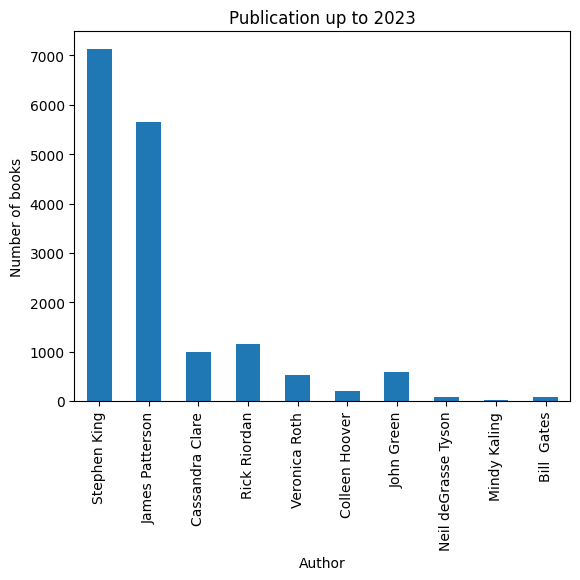

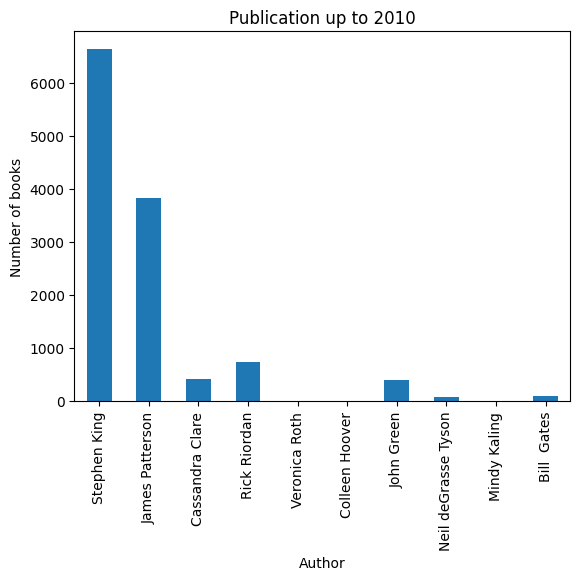

In [35]:
#For each of the authors, give a convenient plot showing how many books has
#the given author published UP TO a given year. Are these authors contemporary
#with each other? Can you notice a range of years where their production rate
#was higher?
        #UP TO a given year = FINO A un determinato anno
#First we create a dictionary with the author name as the key and the books as the elements for each one.
names_influent= authors_influential['name'] #the dataframe authors_influential was defined in the solution of point 5.
def books_influent_dict(names_influent, given_year, dataframe):
  diz = dict()
  for i in names_influent:
    influent_10 = dataframe[dataframe['author_name']==i]
    influent_10 = influent_10.dropna(subset=['publication_year'])
    published_books = influent_10[influent_10['publication_year'] <= given_year]
    books = list(published_books['title'])
    diz[i] = books

  return(diz)

def hist_uptoyear(year, influent_df):
  diz_books_influent = books_influent_dict(names_influent, year, influent_df)
  #Creating a dictionary to count how many books there are for each author
  counts_dict = {}
  for i, j in diz_books_influent.items():
    counts_dict[i]=len(j)
  #Transforming the dictionary into dataframe
  df_counts = pd.DataFrame(list(counts_dict.items()), columns=['author', 'number_of_books'])

  #Histogram
  df_counts.plot.bar(x='author', y='number_of_books', legend=False)
  plt.title(f'Publication up to {year}')
  plt.xlabel('Author')
  plt.ylabel('Number of books')
  plt.show()

#Trying for the histogram function up to two different years.
hist_uptoyear(2023, df1)
hist_uptoyear(2010, df1)

In [29]:
from scipy import stats
#PUNTO 8
#Compare the average rate distribution for English and non-English books with
#a proper statistical procedure. What can you conclude about those two groups?

english = df1[df1['language'] == 'eng']
not_english = df1[df1['language'] != 'eng']

#To compare the average rate distribution we use scipy.stats.ttest_ind() that
#calculates the T-test for the means of two independent samples of scores.

# H0: m_english = m_not_english
# H1: otherwise
t_stat, p_value = stats.ttest_ind(english['average_rating'], not_english['average_rating'], equal_var=False)

#Level of significancy
alpha = 0.05
if p_value < alpha:
  print("The distributions have a significant difference between each other.")
else:
  print("There isn't a  significant difference between the two distributions.")

#COMMENTO...

The distributions have a significant difference between each other.


In [30]:
#About the two groups in the previous question, extract helpful statistics like
#mode, mean, median, and quartiles, explaining their role in a box plot.

english = english.dropna(subset=['average_rating'])
not_english = not_english.dropna(subset=['average_rating'])

english['average_rating'] = english['average_rating'].astype(float)
not_english['average_rating'] = not_english['average_rating'].astype(float)

print("For the two groups of English books and non-English books")
#mode
mode_english = english['average_rating'].mode()
mode_not_english = not_english['average_rating'].mode()
print("the modes are: ", mode_english, ',', mode_not_english)

#mean
mean_english = english['average_rating'].mean()
mean_not_english = not_english['average_rating'].mean()
print("the means are: ", mean_english, ',', mean_not_english)

#median = quartile q2
median_english = english['average_rating'].median()
median_not_english = not_english['average_rating'].median()
print("the medians are: ", median_english, ',', median_not_english)

#quartiles
#q1
q1_english = english['average_rating'].quantile(0.25)
q1_not_english = not_english['average_rating'].quantile(0.25)
print("the first quartiles are: ", q1_english, ',', q1_not_english)

#q3
q3_english = english['average_rating'].quantile(0.75)
q3_not_english = not_english['average_rating'].quantile(0.75)
print("the third quartiles are: ", q3_english, ',', q3_not_english)

For the two groups of English books and non-English books
the modes are:  0    0.0
Name: average_rating, dtype: float64 , 0    0.0
Name: average_rating, dtype: float64
the means are:  3.6891442183375447 , 3.213273636119775
the medians are:  3.9 , 3.79
the first quartiles are:  3.6 , 3.26
the third quartiles are:  4.13 , 4.06


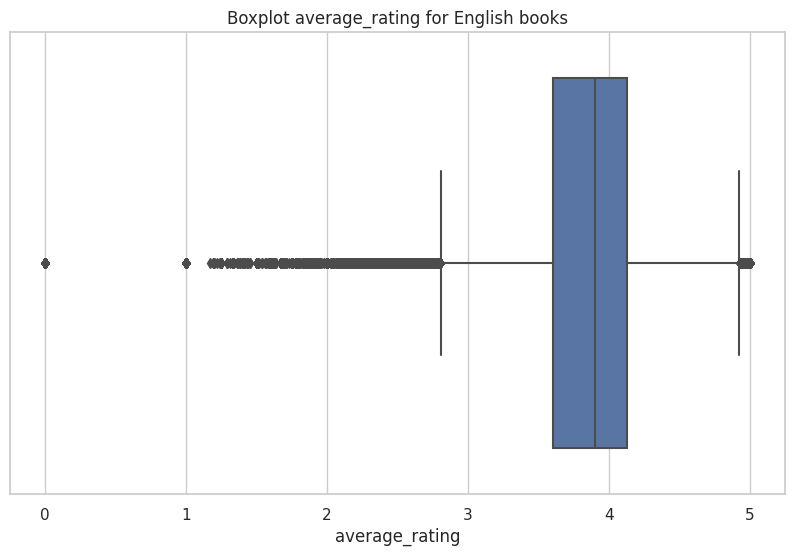

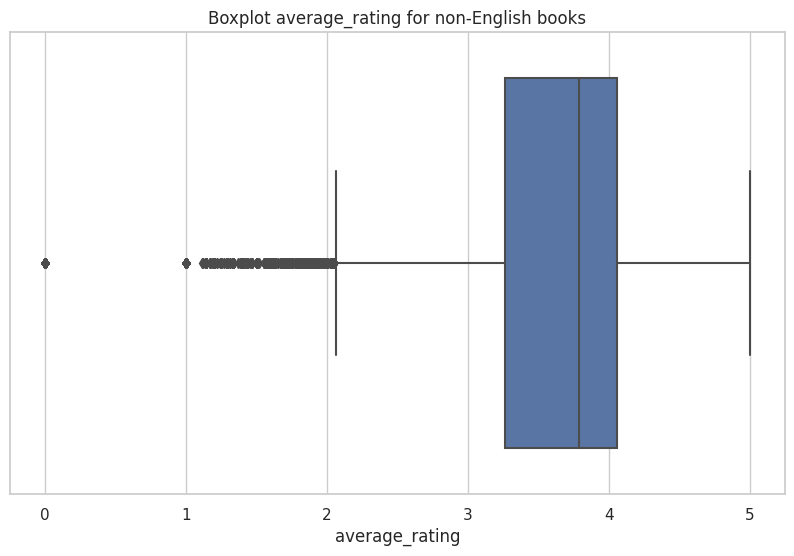

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#boxplot: dataframe 'english'
sns.set(style="whitegrid")  #Style of the boxplot
plt.figure(figsize=(10, 6))  #Dimensions of the graph
sns.boxplot(x=english['average_rating'])
plt.title("Boxplot average_rating for English books")
plt.show()

#boxplot: dataframe 'not_english'
sns.set(style="whitegrid")  #Style of the boxplot
plt.figure(figsize=(10, 6))  #Dimensions of the graph
sns.boxplot(x=not_english['average_rating'])
plt.title("Boxplot average_rating for non-English books")
plt.show()

#MANCA COMMENTO....

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

#It seems reasonable to assume that authors with more fans should have more
#reviews, but maybe their fans are a bit lazy. Confirm or reject this with a
#convenient statistical test or a predictive model.
data_model = df1[['fans_count', 'text_reviews_count']]
data_model = data_model.dropna()



In [27]:
print(english['average_rating'])

Series([], Name: average_rating, dtype: float64)


In [28]:
print(df1['language'])

0          eng
1          eng
2          eng
3          eng
4          eng
          ... 
7027426    swe
7027427    eng
7027428    por
7027429       
7027430    eng
Name: language, Length: 7027431, dtype: object
